<a href="https://colab.research.google.com/github/PatrykCiwinski/Final_project_NLP/blob/main/projekt_ko%C5%84cowy_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import tensorflow as tf
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC


In [5]:
from sklearn.metrics import classification_report,confusion_matrix

# Loading datasets

In [ ]:
!pip install gdown

In [2]:
!gdown --id 1NZaNaYKEE_RrKbH-ohRQIW0mJuZJT5R5

!gdown --id 1VyDjoSGEbwC_5iCHoeBJQgJSsDxosYly

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NZaNaYKEE_RrKbH-ohRQIW0mJuZJT5R5
To: /content/test.csv
100% 1.83M/1.83M [00:00<00:00, 203MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VyDjoSGEbwC_5iCHoeBJQgJSsDxosYly
To: /content/train.csv
100% 29.1M/29.1M [00:00<00:00, 47.5MB/s]


In [6]:
test_data = pd.read_csv("/content/test.csv")
train_data = pd.read_csv("/content/train.csv")

# Get to know with datasets

In [ ]:
train_data.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
test_data.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  7600 non-null   int64 
 1   Title        7600 non-null   object
 2   Description  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.2+ KB


Joining Title and Description columns

In [ ]:
train_data['text'] = train_data['Title'] + ' ' + train_data['Description']
test_data['text'] = test_data['Title'] + ' ' + test_data['Description']

In [ ]:
train_data.head()

,Class Index,Title,Description,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [ ]:
train_data = train_data.drop(columns=['Title', 'Description'])
test_data = test_data.drop(columns=['Title', 'Description'])

In [ ]:
train_data.head()

,Class Index,text
0,3,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new..."


In [ ]:
labels = {1:'World News', 2:'Sports News', 3:'Business News', 4:'Science-Technology News'}

In [ ]:
train_data['label'] = train_data['Class Index'].map(labels)
test_data['label'] = test_data['Class Index'].map(labels)


In [ ]:
train_data = train_data.drop(columns=['Class Index'])
test_data = test_data.drop(columns=['Class Index'])

In [ ]:
train_data.head()

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,Business News
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Business News
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business News
3,Iraq Halts Oil Exports from Main Southern Pipe...,Business News
4,"Oil prices soar to all-time record, posing new...",Business News


# Text cleaning

## Special chars and punctuation.

In [ ]:
def clean(text):
    text = re.sub('\[.*?\]', '', text) # special chars del
    text = re.sub('https?://\S+|www\.\S+', '', text) # del of URsL
    text = re.sub('<.*?>+', '', text) # del of HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # del of punctuation signs
    text = re.sub('\n', '', text) # new line sign del
    text = re.sub('\w*\d\w*', '', text) # del of whitespaces and digits
    text = re.sub('  ', ' ', text)
    return text

In [ ]:
train_data['text'] = train_data['text'].apply(lambda x:clean(x))
test_data['text'] = test_data['text'].apply(lambda x:clean(x))

In [ ]:
train_data['text'][0]

'Wall St Bears Claw Back Into the Black Reuters Reuters Shortsellers Wall Streets dwindlingband of ultracynics are seeing green again'

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
X_train=train_data['text']

In [ ]:
y_train=train_data['label']

In [ ]:
X_test=test_data['text']

In [ ]:
y_test=test_data['label']

#Naive bayes default

In [ ]:
vectorizer=CountVectorizer()

In [ ]:
X_trains=vectorizer.fit_transform(X_train)

In [ ]:
X_tests=vectorizer.transform(X_test)

In [ ]:
model=MultinomialNB()

In [ ]:
model.fit(X_trains,y_train)

MultinomialNB()

In [ ]:
predictions = model.predict(X_tests)

In [ ]:
print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

          Business News       0.87      0.84      0.86      1900
Science-Technology News       0.86      0.88      0.87      1900
            Sports News       0.95      0.98      0.96      1900
             World News       0.91      0.89      0.90      1900

               accuracy                           0.90      7600
              macro avg       0.90      0.90      0.90      7600
           weighted avg       0.90      0.90      0.90      7600



In [ ]:
cm=confusion_matrix(y_test,predictions)

<Axes: >

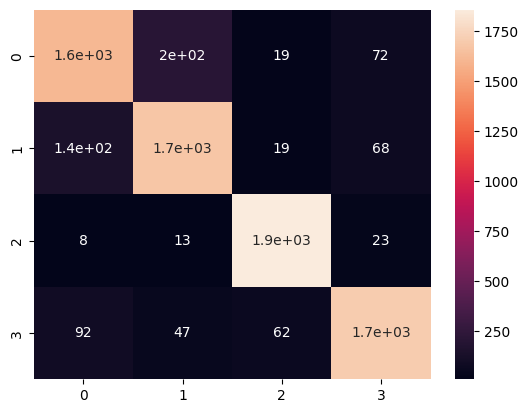

In [ ]:
sns.heatmap(cm,annot=True)

#Naive bayes with stop words

In [ ]:
vectorizer2 = CountVectorizer(stop_words='english')

In [ ]:
X_trained=vectorizer2.fit_transform(X_train)

In [ ]:
X_tested=vectorizer2.transform(X_test)

In [ ]:
model.fit(X_trained,y_train)

MultinomialNB()

In [ ]:
predictions = model.predict(X_tested)

In [ ]:
print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

          Business News       0.87      0.86      0.86      1900
Science-Technology News       0.88      0.88      0.88      1900
            Sports News       0.95      0.98      0.96      1900
             World News       0.91      0.90      0.91      1900

               accuracy                           0.90      7600
              macro avg       0.90      0.90      0.90      7600
           weighted avg       0.90      0.90      0.90      7600



##SVC default

In [ ]:
svc=LinearSVC()

In [ ]:
svc.fit(X_trains,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
predictions_svc = svc.predict(X_tests)

In [ ]:
print(classification_report(y_test,predictions_svc))

                         precision    recall  f1-score   support

          Business News       0.86      0.87      0.86      1900
Science-Technology News       0.87      0.87      0.87      1900
            Sports News       0.95      0.96      0.95      1900
             World News       0.90      0.89      0.90      1900

               accuracy                           0.90      7600
              macro avg       0.90      0.90      0.90      7600
           weighted avg       0.90      0.90      0.90      7600



In [ ]:
cm2=confusion_matrix(y_test,predictions_svc)

<Axes: >

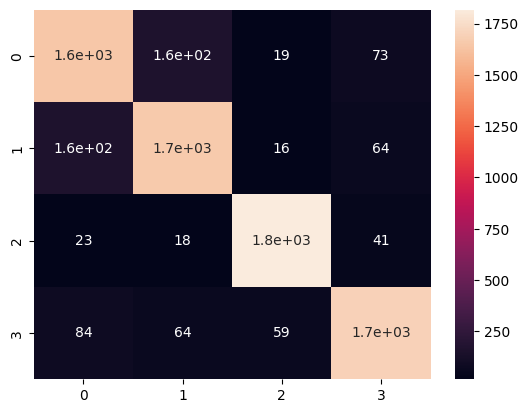

In [ ]:
sns.heatmap(cm2,annot=True)

##SVC stopwords



In [ ]:
svc.fit(X_trained,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
predictions_svc = svc.predict(X_tested)

In [ ]:
print(classification_report(y_test,predictions_svc))

                         precision    recall  f1-score   support

          Business News       0.86      0.86      0.86      1900
Science-Technology News       0.87      0.87      0.87      1900
            Sports News       0.95      0.96      0.96      1900
             World News       0.90      0.89      0.90      1900

               accuracy                           0.90      7600
              macro avg       0.90      0.90      0.90      7600
           weighted avg       0.90      0.90      0.90      7600



#Lemma_tokenizer

In [ ]:
def get_wordnet_pos(word_tag):
  if word_tag.startswith('J'):
    return wordnet.ADJ
  elif word_tag.startswith('V'):
    return wordnet.VERB
  elif word_tag.startswith('N'):
    return wordnet.NOUN
  elif word_tag.startswith('r'):
    return wordnet.ADV
  else:
    return wordnet.NOUN


In [ ]:
class LemmaToken:
  def __init__(self):
    self.lemma = WordNetLemmatizer()
  def __call__(self, doc):
    tokens= word_tokenize(doc)
    word_tags=nltk.pos_tag(tokens)
    return [self.lemma.lemmatize(word, pos=get_wordnet_pos(word_tag)) for word, word_tag in word_tags]

##NB with lemmatization

In [ ]:
vectorizer=CountVectorizer(tokenizer=LemmaToken())
X_trained=vectorizer.fit_transform(X_train)
X_tested=vectorizer.transform(X_test)

In [ ]:
model=MultinomialNB()

In [ ]:
model.fit(X_trained,y_train)

MultinomialNB()

In [ ]:
predictions=model.predict(X_tested)

In [ ]:
print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

          Business News       0.87      0.85      0.86      1900
Science-Technology News       0.87      0.88      0.87      1900
            Sports News       0.95      0.98      0.96      1900
             World News       0.91      0.90      0.90      1900

               accuracy                           0.90      7600
              macro avg       0.90      0.90      0.90      7600
           weighted avg       0.90      0.90      0.90      7600



##SVC with lemmatization

In [ ]:
svc=LinearSVC()

In [ ]:
svc.fit(X_trained,y_train)

In [ ]:
predictions=svc.predict(X_tested)

In [ ]:
print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

          Business News       0.86      0.87      0.86      1900
Science-Technology News       0.87      0.87      0.87      1900
            Sports News       0.95      0.96      0.96      1900
             World News       0.91      0.89      0.90      1900

               accuracy                           0.90      7600
              macro avg       0.90      0.90      0.90      7600
           weighted avg       0.90      0.90      0.90      7600



##NB with lemmatization and stop words

In [ ]:
vectorizer=CountVectorizer(tokenizer=LemmaToken(),stop_words='english')
X_trained=vectorizer.fit_transform(X_train)
X_tested=vectorizer.transform(X_test)

In [ ]:
model.fit(X_trained,y_train)

MultinomialNB()

In [ ]:
predictions=model.predict(X_tested)

In [ ]:
print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

          Business News       0.87      0.85      0.86      1900
Science-Technology News       0.87      0.87      0.87      1900
            Sports News       0.95      0.98      0.97      1900
             World News       0.91      0.90      0.90      1900

               accuracy                           0.90      7600
              macro avg       0.90      0.90      0.90      7600
           weighted avg       0.90      0.90      0.90      7600



##SVC with lemmatization and stopwords

In [ ]:
svc=LinearSVC()

In [ ]:
svc.fit(X_trained,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
predictions=svc.predict(X_tested)

In [ ]:
print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

          Business News       0.86      0.86      0.86      1900
Science-Technology News       0.87      0.87      0.87      1900
            Sports News       0.95      0.96      0.96      1900
             World News       0.91      0.89      0.90      1900

               accuracy                           0.90      7600
              macro avg       0.90      0.90      0.90      7600
           weighted avg       0.90      0.90      0.90      7600



#Stemming

In [ ]:
class StemToken:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self,doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(token) for token in tokens]

##NB with stemming

In [ ]:
vectorizer=CountVectorizer(tokenizer=StemToken())
X_trained=vectorizer.fit_transform(X_train)
X_tested=vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
model.fit(X_trained,y_train)

MultinomialNB()

In [ ]:
predictions=model.predict(X_tested)

In [ ]:
print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

          Business News       0.87      0.85      0.86      1900
Science-Technology News       0.87      0.88      0.87      1900
            Sports News       0.95      0.98      0.96      1900
             World News       0.91      0.90      0.90      1900

               accuracy                           0.90      7600
              macro avg       0.90      0.90      0.90      7600
           weighted avg       0.90      0.90      0.90      7600



In [ ]:
pred_text=vectorizer.transform(['credit card'])

In [ ]:
model.predict(pred_text)

array(['Business News'], dtype='<U23')

##SVC with stemming

In [ ]:
svc.fit(X_trained,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
predictions=svc.predict(X_tested)

In [ ]:
print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

          Business News       0.85      0.86      0.86      1900
Science-Technology News       0.86      0.88      0.87      1900
            Sports News       0.96      0.95      0.95      1900
             World News       0.91      0.89      0.90      1900

               accuracy                           0.90      7600
              macro avg       0.90      0.90      0.90      7600
           weighted avg       0.90      0.90      0.90      7600

